In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [282]:
df = pd.read_csv('/content/data.csv',skipfooter=4, sep=';')

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [283]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


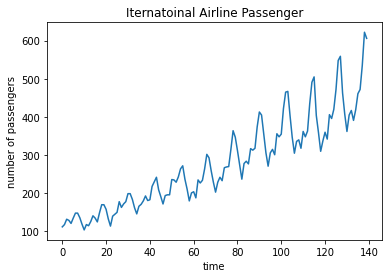

In [284]:
dataset = df.iloc[:,1].values
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('number of passengers')
plt.title('Iternatoinal Airline Passenger')
plt.show()

# Preprocessing

In [285]:
dataset = dataset.reshape(-1 , 1)
dataset = dataset.astype('float32')
dataset.shape

(140, 1)

In [286]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)

In [287]:
dataset[0:5]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]], dtype=float32)

## deviser l'ensemble d'apprentissage en ensemble d'apprentissage et ensemble de test

In [288]:
train_size = int(len(dataset)*0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size, :]
test = dataset[train_size: len(dataset), :]
print('train_size : {}, test_size : {}'.format(len(train),len(test)))


train_size : 70, test_size : 70


## construction de x_train et y_train



In [289]:
timestamp = 10
dataX = []
dataY = []
for i in range(len(train)-timestamp-1):
  a = train[i: (i+timestamp), 0]
  dataX.append(a)
  dataY.append(train[(i+timestamp), 0])
x_train = np.array(dataX)
y_train = np.array(dataY)


## construction de x_test et y_test


In [290]:
timestamp = 10
dataX = []
dataY = []
for i in range(len(test)-timestamp-1):
  a = test[i: (i+timestamp), 0]
  dataX.append(a)
  dataY.append(test[(i+timestamp), 0])
x_test = np.array(dataX)
y_test = np.array(dataY)

# Reshaping x_tarin et x_test

In [291]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Création du model LSTM

In [292]:
model = Sequential()
np_epochs = 50
batch_size = 1

# couche 1
model.add(LSTM(10, input_shape=(1, timestamp), activation='relu', return_sequences=True))
model.add(Dropout(0.5))

# couche 2
model.add(LSTM(10, input_shape=(1, timestamp), activation='relu'  ))
model.add(Dropout(0.5))



# couche 3
model.add(Dense(1, activation='relu'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs = np_epochs, batch_size = batch_size)

Epoch 1/50
59/59 [==============================] - 2s 2ms/step - loss: 0.0238
Epoch 2/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 3/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 4/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 5/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 6/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 7/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 8/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 9/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 10/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 11/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 12/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 13/50
59/59 [==============================

# test du model

In [293]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict =  scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (train_score))

test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (test_score))

2/2 [==============================] - 0s 6ms/step
Train Score: 33.71 RMSE
Test Score: 65.24 RMSE


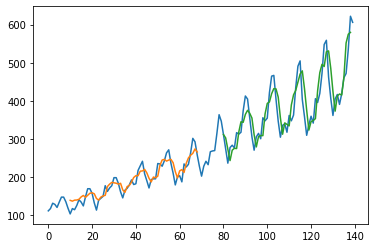

In [280]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestamp:len(train_predict)+timestamp, :] = train_predict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(timestamp*2)+1:len(dataset)-1, :] = test_predict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()